# Sentiment Analysis Using Machine Learning Models

By: Nicole Carter and Kelley Zhou

Dataset: https://www.kaggle.com/datasets/anandshaw2001/chatgpt-users-reviews/data

### Import Initial Libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

import string
import math

# Imports for visualization
import matplotlib.pyplot as plt

# import for emojis
import emoji

#imports for scikit learn
from sklearn.feature_extraction.text import TfidfVectorizer

# nltk.download('stopwords')

### Initialize Stopwords, Stemmer, and Translator

We want to initialize these to use in data cleaning and preprocessing.

- Stopwords, such as "the","a", and "in", are considered insignificant words that are ignored when indexing and retrieving entries. 
- Stemming is to reduce words to their root form without any suffix. In this project, we're going to utilize the Lancaster Stemmer
- The Translator is used to remove punctuation such as exclamation points, periods, and commas. 

In [2]:
# Remove stopwords like and, the, of
stop_words = set(stopwords.words('english'))

# Stem words with LancasterStemmer, running -> run
stemmer = LancasterStemmer()

# gets rid of some punctuation
translator = str.maketrans('','', string.punctuation)

### Read the File 

We want to read only the necessary columns from the file. In this case, the columns we want are 'Review' and 'Ratings'.

We also want to check if there are any rows in the column are empty/have null values.

In [3]:
# read csv files
read_df = pd.read_csv('ChatGPT_Reviews.csv', encoding='utf-8')

# remove certain columns
df = pd.DataFrame(read_df, columns = ['Review', 'Ratings'])

# print information about the data
# print(df.info())

# check for null values
df.isnull().sum()



Review     6
Ratings    0
dtype: int64

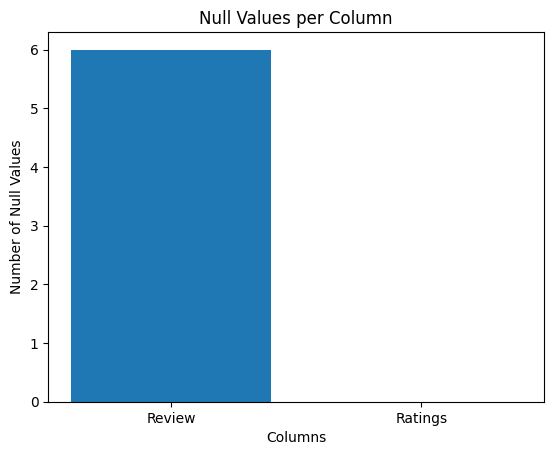

In [4]:
#bar graph for visualization
col_name = ['Review', 'Ratings']
null_sum = [df['Review'].isnull().sum(), df['Ratings'].isnull().sum()]
plt.bar(col_name, null_sum)
plt.title('Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()

We can see that there are 6 rows in the 'Review' column that are empty. This indicates that there are 6 ratings that have no review. We want to remove rows that have only ratings to eliminate bias in the case where a user leaves a bad rating just to lower the overall rating.

Below, we remove rows that contain only ratings and no reviews. Then, we output the count of each rating. 

In [5]:
# remove rows with null values
df.dropna(inplace=True)

df = df[pd.to_numeric(df['Ratings'], errors='coerce').notna()]



# check distribution of sentiment labels
df['Ratings'].value_counts()

Ratings
5    150212
4     22897
1     12080
3      8157
2      3375
Name: count, dtype: int64

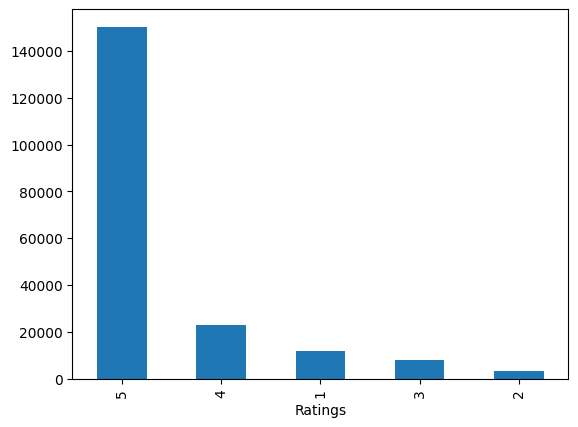

In [6]:
# visual of ratings distribution
# Create visual of the data
df['Ratings'].value_counts().plot(kind='bar')
plt.show()

Users rate their experience with ChatGPT on a scale of 1-5, with 5 being the highest possible rating. We can see that the majority of the ratings are 5s. 

Conclusion: We can conclude that the order of prominent ratings (as of August 23, 2024) are 5, 4, 1, 3, 2 - indicating that most users rate ChatGPT positively.

### Data Cleaning and Preprocessing

We want to clean and preprocess the data so that it is readable for the algorithm. 

In this step, we:
- Remove stopwords
- Lowercase all the text
- Remove punctuation 
- Remove digits
- Remove emojis
- Apply stemming

In [7]:
# clean/preprocess the data

# Take out emojis
df['Review'] = df['Review'].apply(lambda s: emoji.replace_emoji(s, ''))

#only want to apply this part to the training set
# go through all the reviews and apply stopwords, stemmer, and translator to them
for row in df.index:
    if df.loc[row, 'Review'] is np.nan:
        continue #ignore if there is no review and only a rating
    
    text = df.loc[row, 'Review']
    
    text = text.lower()

    #remove punctuation
    text2 = text.translate(translator)
    tokenized_words = text2.split() # a list of words, where each word is a token
    
    #remove stopwords from text
    removed_stopwords = []
    for word in tokenized_words:
        if word not in stop_words:
            removed_stopwords.append(word)

    # apply stemmer
    removed_stopwords = [stemmer.stem(word) for word in removed_stopwords]
    
    #remove digits from string
    for i in range(0, len(removed_stopwords)):
        result = ''.join(filter(str.isalpha, removed_stopwords[i]))
        removed_stopwords[i] = result

    ans = ' '.join(removed_stopwords)

    # print(removed_stopwords)
    df.loc[row, 'Review'] = ans
    
        


In [8]:
#display info
df.head(10)

,Review,Ratings
0,good,5
1,good,5
2,nic ap,5
3,nic ig,5
4,gre ap bot acc anyth giv tip gam study lif etc...,5
5,nic ap,5
6,lov ap guy,4
7,gre ap,1
8,impress,5
9,help cod lot ai gre everyon,5


In [9]:
#check number of ratings/reviews to see if equal (if dropna worked properly)
df.isnull().sum()

Review     0
Ratings    0
dtype: int64

### Split Into Training and Testing Sets

In [10]:
#split into training and testing sets
df_train = df[0:98360]
df_test = df[98361:196721]

### Select Features to Use and Apply TF-IDF Vectorizer

TF-IDF takes individual words and assigns weights to them. We apply this to both training and testing sets.

In [11]:
#select features for training and testing sets
X_train = df_train['Review']
X_test = df_test['Review']
y_train = df_train['Ratings']
y_test = df_test['Ratings']

# Apply tfidf
tfidf = TfidfVectorizer(ngram_range=(1,2)) #bi-grams, takes into account the word after
XV_train = tfidf.fit_transform(X_train)
XV_test = tfidf.transform(X_test)

### Analysis Using Machine Learning Models

Now, we feed the data into the following machine learning models.

The models utilized in this project are:
- Logistic Regression
- Naive Bayes
- Decision Tree Classifier

#### Logistic Regression

Training...
Predicting...
Accuracy: 0.8064152094347296
Precision: 0.7364134662104462
Recall: 0.8064152094347296
F1 Score: 0.7486800741931384
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.45      0.54      6044
           2       0.06      0.00      0.00      1418
           3       0.29      0.03      0.05      3553
           4       0.38      0.07      0.12     10583
           5       0.82      0.99      0.90     76762

    accuracy                           0.81     98360
   macro avg       0.45      0.31      0.32     98360
weighted avg       0.74      0.81      0.75     98360



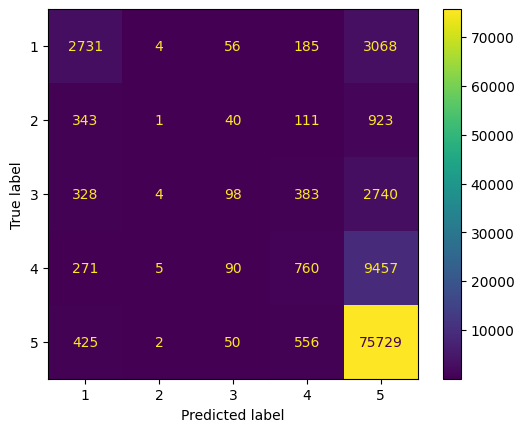

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

print("Training...")
LogRegModel = LogisticRegression(max_iter = 300).fit(XV_train,y_train)
print("Predicting...")
y_pred = LogRegModel.predict(XV_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision =  metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
print("Accuracy:",  accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

# Produce a confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LogRegModel.classes_)
disp.plot()

### Naive Bayes

Training...
Predicting...
Accuracy: 0.7839467263115087
Precision: 0.7488109008746501
Recall: 0.7839467263115087
F1 Score: 0.6926369217056405
Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.06      0.11      6044
           3       1.00      0.00      0.00      3553
           4       0.36      0.00      0.00     10583
           5       0.78      1.00      0.88     76762

   micro avg       0.78      0.80      0.79     96942
   macro avg       0.75      0.26      0.25     96942
weighted avg       0.75      0.80      0.70     96942



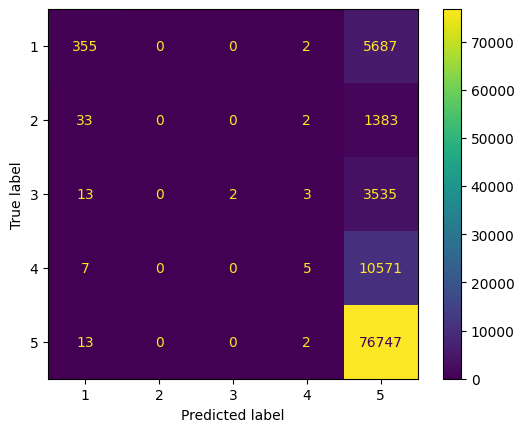

In [13]:
from sklearn import naive_bayes

print("Training...")
NBModel = naive_bayes.MultinomialNB()
NBModel.fit(XV_train, y_train)
print("Predicting...")
y_pred = NBModel.predict(XV_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision =  metrics.precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
print("Accuracy:",  accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred, labels=np.unique(y_pred)))

# Produce a confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=NBModel.classes_)
disp.plot()

### Decision Tree Classifier

Training...
Predicting...
Accuracy: 0.7625660837738918
Precision: 0.7054211487060805
Recall: 0.7625660837738918
F1 Score: 0.7291995330209574
Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.41      0.45      6044
           2       0.08      0.04      0.05      1418
           3       0.13      0.07      0.09      3553
           4       0.19      0.09      0.12     10583
           5       0.83      0.93      0.88     76762

    accuracy                           0.76     98360
   macro avg       0.35      0.31      0.32     98360
weighted avg       0.71      0.76      0.73     98360



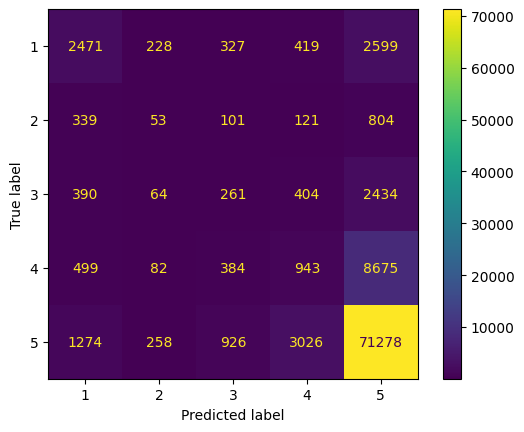

In [14]:
from sklearn.tree import DecisionTreeClassifier

#set up decision tree classifier

#random_state = controls randomness, if set to an integer, it is seeded by that integer
DTModel = DecisionTreeClassifier(random_state=42) 

print("Training...")
DTModel.fit(XV_train, y_train)
print("Predicting...")
y_pred = DTModel.predict(XV_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision =  metrics.precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
print("Accuracy:",  accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred, labels=np.unique(y_pred)))

# Produce a confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DTModel.classes_)
disp.plot()

### Conclusion

From the three different models, we obtained these accuracy scores:

- Logistic Regression: 0.8064152094347296 = 80.6%
- Naive Bayes: 0.7839467263115087 = 78.4%
- Decision Tree Classifier: 0.7625660837738918 = 76.3%

These accuracy scores indicate the performance of the model. 

**Logistic Regression** achieved the highest accuracy score with 80.6%, followed by Naive Bayes with 78.4%, and finally Decision Tree Classifier with 76.3%.